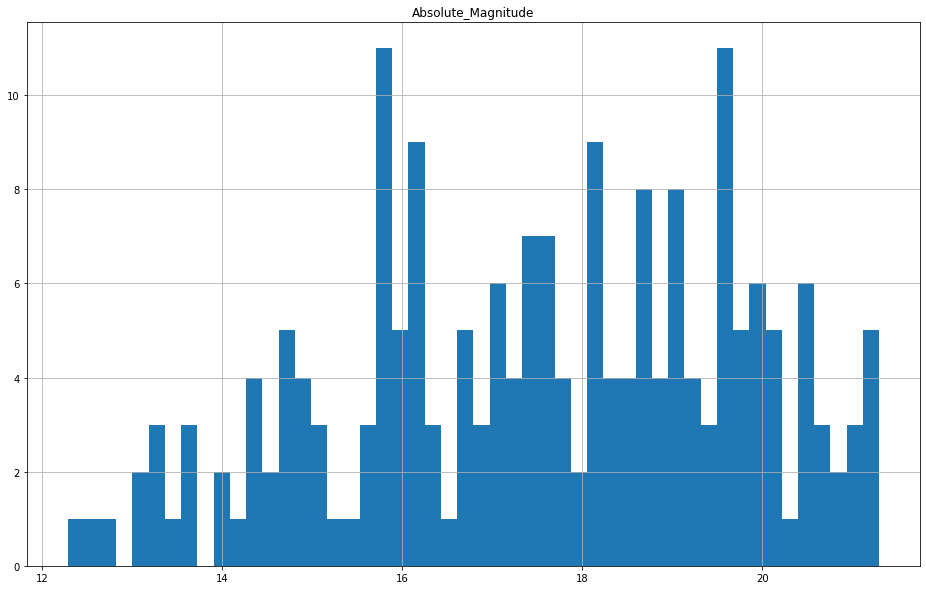

In [84]:
import pandas as pd
import requests
import io



#importing the stardata file
url = "https://raw.githubusercontent.com/Arhaan/CABKrittikaTutorials/main/Selection_Assignment/stardata.csv" 
download = requests.get(url).content
heading_list=['RA','Declination','Parallax','Apparent_Magnitude']
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

#Changing the header of the star data file
df.loc[-1]=[56.56677415601188,24.189734528215197,7.3935352662039655,8.208464]
df.index=df.index+1
df=df.sort_index()
df.to_csv("df.csv", header=heading_list, index=False)
df=pd.read_csv("df.csv")


#removing rows for which values of parallax are not known and also changing the dtype of parallax column
df.drop(df[df['Parallax'] == '--'].index, inplace = True)
df[['Parallax']] = df[['Parallax']].apply(pd.to_numeric)


#calculating the value of d
distance=1/df['Parallax']
df.insert(4,'d',distance)


#calculating absolute magnitude

import numpy as np

M=df['Apparent_Magnitude']+5-5*np.log10(df['d'])
df.insert(5,'Absolute_Magnitude',M)

#ploting. the data


import matplotlib.pyplot as plt

df.hist(column='Absolute_Magnitude', bins = 50,figsize=(16,10))
plt.show()
